##### Задание 1

1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,  
Ответ: изменение средней стоимости квадратного метра во времени - это временной ряд. 
Если речь про цены в отдельных случайных сделках по продаже недвижимости, то это не временной ряд

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,  
Ответ: временной ряд  

в) количество отказов компьютера,  
Ответ: количество отказов компьютера за промежутки времени, то это временной ряд  

г) число обращений в поликлинику по району,  
Ответ: число обращений в поликлинику в отдельные дни, месяцы, годы - временной ряд

д) координаты автобуса при движении по маршруту,  
Ответ: временной ряд 

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.  
Ответ: временной ряд, т.к. позиция зависит от позиции на предыдущем временном отрезке.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

##### Задание 2  

2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.



In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


Количество пропусков значений:

In [3]:
data['DUQ_MW'].isnull().sum()

0

Стандартыне статистики пропусков не вывили

Построим график:

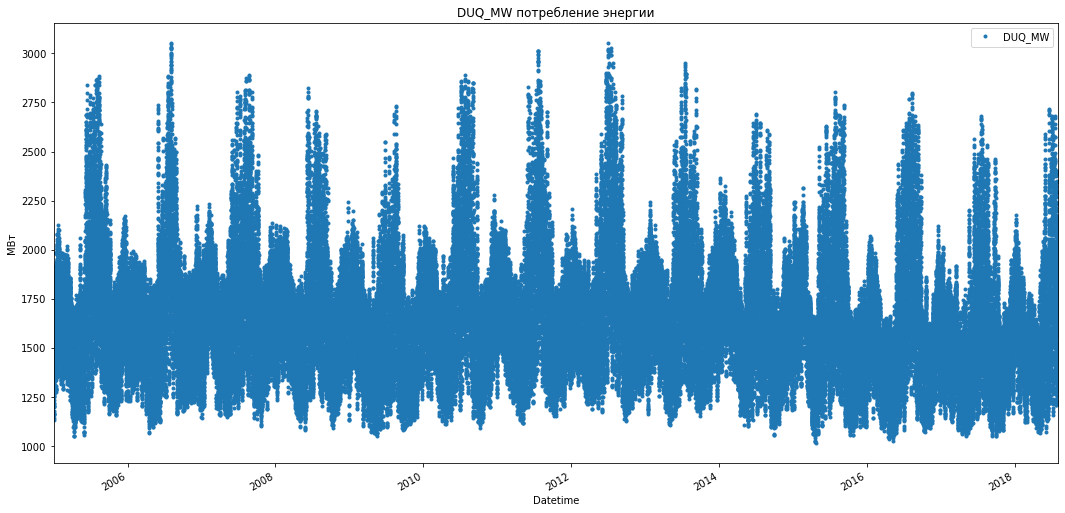

In [4]:
data.plot(style = '.', figsize = ( 18, 9 ), title = 'DUQ_MW потребление энергии')
plt.ylabel ( 'МВт' )
plt.show()

По графику:
1. Четко выражены сезонные изменения
2. Явных выбросов нет

Рассмотрим сезонность на примере 2013 года

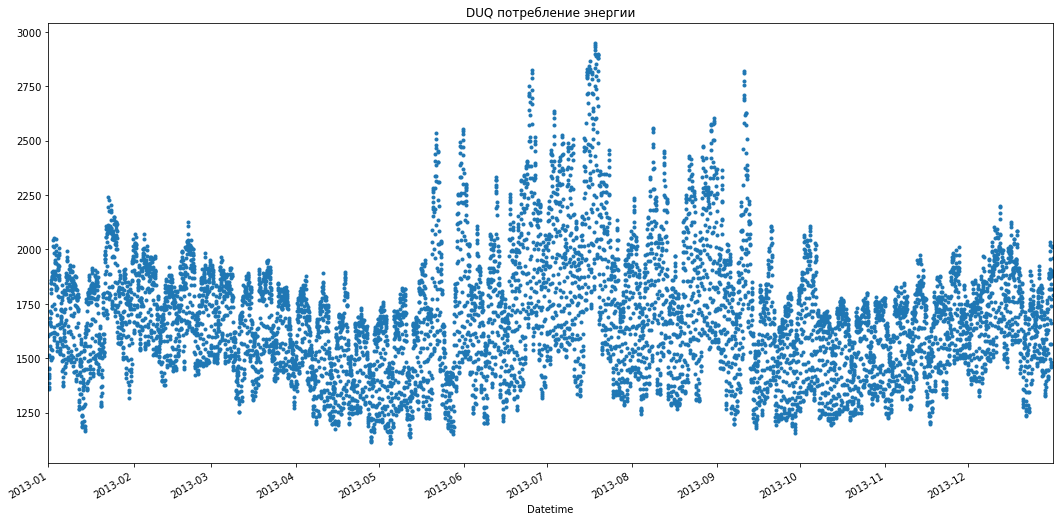

In [5]:
data['date'] = data.index
data_2013 = data.loc[data['date'].dt.year == 2013]
data_2013['DUQ_MW'].plot(style='.', figsize = ( 18, 9 ), title='DUQ потребление энергии' )
plt.show()

Потребление энергии летом превышает зимнее потребление, возможно, это южный штат, в котором летом люди используют кондиционеры

Проанализируем пропуски и дублирующиеся значения:

In [6]:
ut = data['date'].unique()
print(f'число уникальных значений:   {ut.shape[0]} : число наблюдений : {data.shape[0]}. Отклонение {data.shape[0] - ut.shape[0] }')

число уникальных значений:   119064 : число наблюдений : 119068. Отклонение 4


4 дня дублируются.

In [7]:
count_data = data['date'].value_counts()
count_data.head(5)

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

Появление второго часа вероятно связано с переходом на зимнее время в период с 2014 по 2017

In [8]:
full_list_date = pd.date_range(data.index.min(), data.index.max(), freq="H")
diff_list = set(full_list_date) - set(data.index.unique())
print(f'Количество пропущенных дней: {len(diff_list)}')
diff_list

Количество пропущенных дней: 24


{Timestamp('2005-04-03 03:00:00', freq='H'),
 Timestamp('2005-10-30 02:00:00', freq='H'),
 Timestamp('2006-04-02 03:00:00', freq='H'),
 Timestamp('2006-10-29 02:00:00', freq='H'),
 Timestamp('2007-03-11 03:00:00', freq='H'),
 Timestamp('2007-11-04 02:00:00', freq='H'),
 Timestamp('2008-03-09 03:00:00', freq='H'),
 Timestamp('2008-11-02 02:00:00', freq='H'),
 Timestamp('2009-03-08 03:00:00', freq='H'),
 Timestamp('2009-11-01 02:00:00', freq='H'),
 Timestamp('2010-03-14 03:00:00', freq='H'),
 Timestamp('2010-11-07 02:00:00', freq='H'),
 Timestamp('2010-12-10 00:00:00', freq='H'),
 Timestamp('2011-03-13 03:00:00', freq='H'),
 Timestamp('2011-11-06 02:00:00', freq='H'),
 Timestamp('2012-03-11 03:00:00', freq='H'),
 Timestamp('2012-11-04 02:00:00', freq='H'),
 Timestamp('2013-03-10 03:00:00', freq='H'),
 Timestamp('2013-11-03 02:00:00', freq='H'),
 Timestamp('2014-03-09 03:00:00', freq='H'),
 Timestamp('2015-03-08 03:00:00', freq='H'),
 Timestamp('2016-03-13 03:00:00', freq='H'),
 Timestamp

##### Задание 3  

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [9]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [10]:
mean_w_brent_data = brent_data['Значение'].resample('W').mean()
mean_m_brent_data = brent_data['Значение'].resample('M').mean()
mean_y_brent_data = brent_data['Значение'].resample('Y').mean()
std_w_brent_data = brent_data['Значение'].resample('W').std()
std_m_brent_data = brent_data['Значение'].resample('M').std()
std_y_brent_data = brent_data['Значение'].resample('Y').std()

##### Задание 4  

4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.


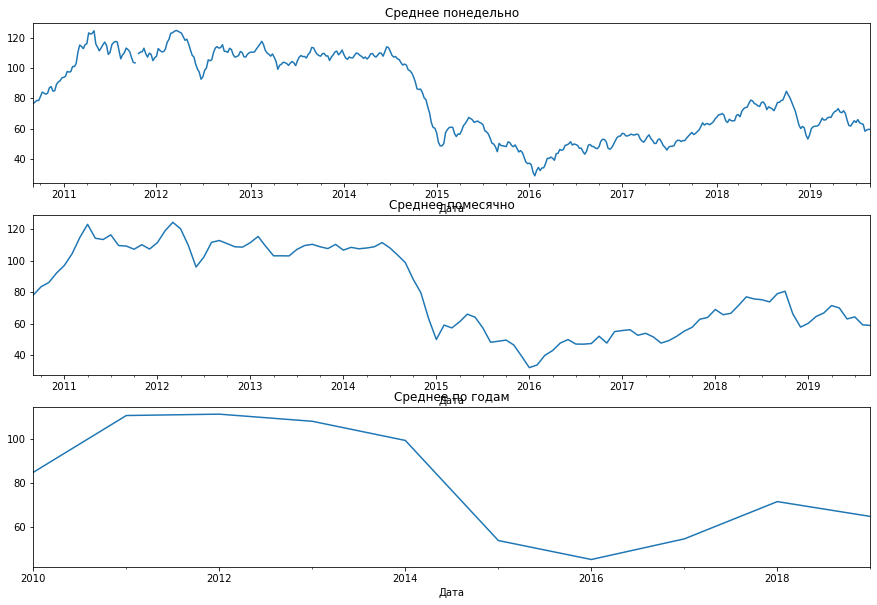

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
mean_w_brent_data.plot(ax=axes[0], title='Среднее понедельно')
mean_m_brent_data.plot(ax=axes[1], title='Среднее помесячно')
mean_y_brent_data.plot(ax=axes[2], title='Среднее по годам')
plt.show()


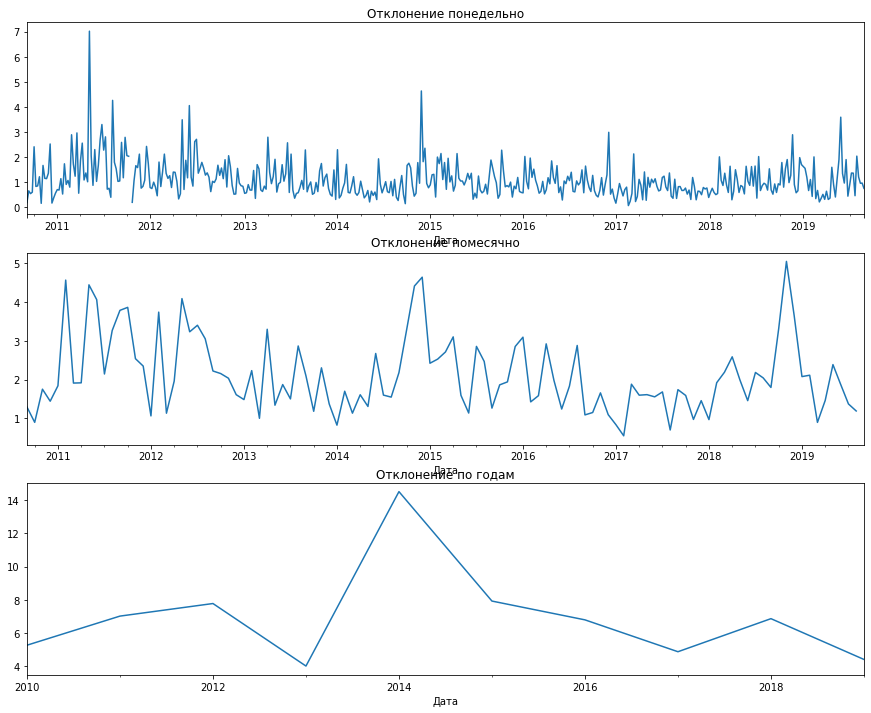

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
std_w_brent_data.plot(ax=axes[0], title='Отклонение понедельно')
std_m_brent_data.plot(ax=axes[1], title='Отклонение помесячно')
std_y_brent_data.plot(ax=axes[2], title='Отклонение по годам')
plt.show()

##### Задание 5  

5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

На более длительных периодах усреднее сглаживает график, выделяя основной тренд.  
При этом графики стандартного отклонения отражают периоды резких скачков, выделяя отдельный промежутки в которых могут быть выбросы или ошибки измерений.  
К примеру, 2012 и 2013 год в среднем не сильно отличается, а в 2011 есть заметный рост с начала года, что хорошо видно на графики отклонений (восстановление после кризиса 2008 года)  
Аналогично видно резкое снижение в конце 2014-2016 годах.  